In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
#from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout,LSTM
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.layers import TimeDistributed, Conv2D, MaxPooling2D, Flatten, Dropout, Dense,LSTM

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [2]:
"""
from google.colab import drive
drive.mount('/content/drive')
https://stackoverflow.com/questions/44778439/keras-tf-time-distributed-cnnlstm-for-visual-recognition
"""

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\nhttps://stackoverflow.com/questions/44778439/keras-tf-time-distributed-cnnlstm-for-visual-recognition\n"

In [3]:
labels = ['Non Oil Spill','Oil Spill']
img_size = 150
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [4]:
train = get_data(r"../input/oil-spill-dataset-binary-image-classification/final dataset used for oil spill/dataset-final/dataset/train")
val = get_data(r"../input/oil-spill-dataset-binary-image-classification/final dataset used for oil spill/dataset-final/dataset/Validation")
test=get_data(r"../input/oil-spill-dataset-binary-image-classification/final dataset used for oil spill/dataset-final/dataset/test")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


In [5]:
#training dataset-oil spill
import os
len(os.listdir("../input/oil-spill-dataset-binary-image-classification/final dataset used for oil spill/dataset-final/dataset/train/Oil Spill"))

1400

In [6]:
#training dataset-Non oil spill
import os
len(os.listdir("../input/oil-spill-dataset-binary-image-classification/final dataset used for oil spill/dataset-final/dataset/train/Non Oil Spill"))

1400

In [7]:
#testing dataset- oil spill
import os
len(os.listdir("../input/oil-spill-dataset-binary-image-classification/final dataset used for oil spill/dataset-final/dataset/test/Oil Spill"))

300

In [8]:
#testing dataset-Non oil spill
import os
len(os.listdir("../input/oil-spill-dataset-binary-image-classification/final dataset used for oil spill/dataset-final/dataset/test/Non Oil Spill"))

300

In [9]:
#validation dataset-oil spill
import os
len(os.listdir("../input/oil-spill-dataset-binary-image-classification/final dataset used for oil spill/dataset-final/dataset/Validation/Oil Spill"))

300

In [10]:
#validation dataset-Non oil spill
import os
len(os.listdir("../input/oil-spill-dataset-binary-image-classification/final dataset used for oil spill/dataset-final/dataset/Validation/Non Oil Spill"))

300

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

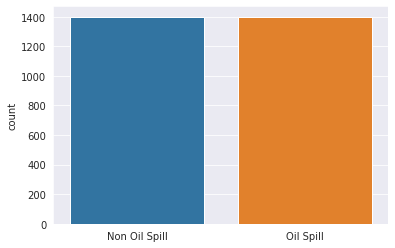

In [11]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Non Oil Spill")
    else:
        l.append("Oil Spill")
sns.set_style('darkgrid')
sns.countplot(l)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

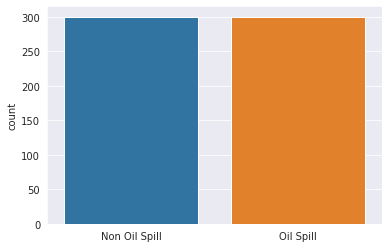

In [12]:
a = []
for i in val:
    if(i[1] == 0):
        a.append("Non Oil Spill")
    else:
        a.append("Oil Spill")
sns.set_style('darkgrid')
sns.countplot(a)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

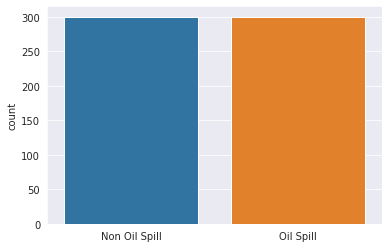

In [13]:
b = []
for i in test:
    if(i[1] == 0):
        b.append("Non Oil Spill")
    else:
        b.append("Oil Spill")
sns.set_style('darkgrid')
sns.countplot(b)

Text(0.5, 1.0, 'Non Oil Spill')

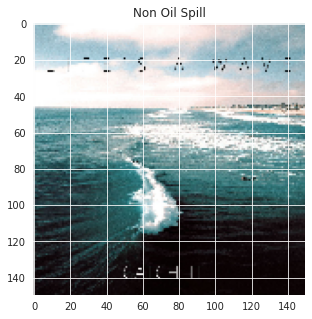

In [14]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'Oil Spill')

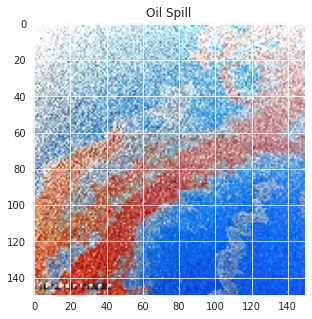

In [15]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [16]:
#train

In [17]:
#test

In [18]:
#val

In [19]:
x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

for feature, label in test:
  x_test.append(feature)
  y_test.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test=np.array(x_test)/255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)



In [20]:
#x_train

In [21]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)
print("x_val:",x_val.shape)
print("y_val:",y_val.shape)

x_train: (2800, 150, 150, 3)
y_train: (2800,)
x_test: (600, 150, 150, 3)
y_test: (600,)
x_val: (600, 150, 150, 3)
y_val: (600,)


In [22]:
datagen = ImageDataGenerator(
       featurewise_center=False,  
       samplewise_center=False,  
       featurewise_std_normalization=False,  
       samplewise_std_normalization=False,  
       zca_whitening=False,  
       rotation_range = 90, 
       zoom_range = 0.5, 
       width_shift_range=0.2,  
       height_shift_range=0.2,  
       horizontal_flip = True,  
       
)


datagen.fit(x_train)
datagen.fit(x_val)
datagen.fit(x_test)

In [23]:
x_train = np.array(x_train).reshape(2800,1,150,150, 3)


In [24]:
#x_train

In [25]:
x_test = np.array(x_test).reshape(600,1,150,150, 3)

In [26]:
x_val = np.array(x_val).reshape(600,1,150,150, 3)

In [27]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)
print("x_val:",x_val.shape)
print("y_val:",y_val.shape)

x_train: (2800, 1, 150, 150, 3)
y_train: (2800,)
x_test: (600, 1, 150, 150, 3)
y_test: (600,)
x_val: (600, 1, 150, 150, 3)
y_val: (600,)


In [28]:
"""
model = Sequential()
model.add(Conv2D(32,(3,3),padding="same", activation="relu", input_shape=(None,150,150,3)))
#model.add(LSTM(32, return_sequences=True))
model.add(MaxPool2D((2, 2), strides=2))

model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
#model.add(LSTM(64, return_sequences=True))
model.add(MaxPool2D((2, 2), strides=2))

model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
#model.add(LSTM(128))
model.add(MaxPool2D((2, 2), strides=2))

model.add(Conv2D(64,(3,3), padding="same", activation="relu"))
model.add(MaxPool2D((2, 2), strides=2))

model.add(LSTM(32, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(128))

model.add(Dropout(0.2))
model.add(Flatten())
#model.add(Dense(128,activation="relu"))

#model.add(Dense(84,activation="relu"))
#model.add(Dense(32,activation="relu"))

model.add(Dense(2, activation="softmax"))

model.summary()
"""

'\nmodel = Sequential()\nmodel.add(Conv2D(32,(3,3),padding="same", activation="relu", input_shape=(None,150,150,3)))\n#model.add(LSTM(32, return_sequences=True))\nmodel.add(MaxPool2D((2, 2), strides=2))\n\nmodel.add(Conv2D(32, (3,3), padding="same", activation="relu"))\n#model.add(LSTM(64, return_sequences=True))\nmodel.add(MaxPool2D((2, 2), strides=2))\n\nmodel.add(Conv2D(64, (3,3), padding="same", activation="relu"))\n#model.add(LSTM(128))\nmodel.add(MaxPool2D((2, 2), strides=2))\n\nmodel.add(Conv2D(64,(3,3), padding="same", activation="relu"))\nmodel.add(MaxPool2D((2, 2), strides=2))\n\nmodel.add(LSTM(32, return_sequences=True))\nmodel.add(LSTM(64, return_sequences=True))\nmodel.add(LSTM(128))\n\nmodel.add(Dropout(0.2))\nmodel.add(Flatten())\n#model.add(Dense(128,activation="relu"))\n\n#model.add(Dense(84,activation="relu"))\n#model.add(Dense(32,activation="relu"))\n\nmodel.add(Dense(2, activation="softmax"))\n\nmodel.summary()\n'

In [54]:
"""
# instantiate model
model = Sequential()

# add three time-distributed convolutional layers for feature extraction
model.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu'),input_shape=(1,150,150, 3)))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(1, 1))))

model.add(TimeDistributed(Conv2D(128, (3,3), activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

model.add(TimeDistributed(Conv2D(128, (3,3), activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

model.add(TimeDistributed(Conv2D(256, (3,3), activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

model.add(TimeDistributed(Conv2D(256, (3,3), activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

# extract features and dropout 
model.add(TimeDistributed(Flatten()))
model.add(Dropout(0.5))

# input to LSTM
model.add(LSTM(256, return_sequences=False, dropout=0.5))

# classifier with sigmoid activation for multilabel
model.add(Dense(2, activation='sigmoid'))

# compile the model with binary_crossentropy loss for multilabel
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

# look at the params before training
#model.summary()
"""


"\n# instantiate model\nmodel = Sequential()\n\n# add three time-distributed convolutional layers for feature extraction\nmodel.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu'),input_shape=(1,150,150, 3)))\nmodel.add(TimeDistributed(MaxPooling2D((2, 2), strides=(1, 1))))\n\nmodel.add(TimeDistributed(Conv2D(128, (3,3), activation='relu')))\nmodel.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))\n\nmodel.add(TimeDistributed(Conv2D(128, (3,3), activation='relu')))\nmodel.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))\n\nmodel.add(TimeDistributed(Conv2D(256, (3,3), activation='relu')))\nmodel.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))\n\nmodel.add(TimeDistributed(Conv2D(256, (3,3), activation='relu')))\nmodel.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))\n\n# extract features and dropout \nmodel.add(TimeDistributed(Flatten()))\nmodel.add(Dropout(0.5))\n\n# input to LSTM\nmodel.add(LSTM(256, return_sequences=False, dropout=0.5))\n\

In [56]:
"""
model.summary()
"""

'\nmodel.summary()\n'

In [60]:
model = Sequential()
model.add(TimeDistributed(Conv2D(64,(3,3),activation='relu'),input_shape=(1,150,150,3)))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))

model.add(TimeDistributed(Conv2D(32,(3,3),activation='relu')))
#model_mix_shoulder.add(TimeDistributed(Conv2D(128,(3,3),activation='relu')))
#model_mix_shoulder.add(TimeDistributed(Conv2D(56,(3,3),activation='relu')))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))

#model_mix_shoulder.add(TimeDistributed(Conv2D(256,(3,3),activation='relu')))
#model_mix_shoulder.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))


model.add(TimeDistributed(Flatten()))

#RNN
model.add(LSTM(100,return_sequences=False))

model.add(Dense(2,activation='sigmoid'))
#model.add(activation('sigmoid'))

#model.summary()

In [61]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_56 (TimeDis (None, 1, 148, 148, 64)   1792      
_________________________________________________________________
time_distributed_57 (TimeDis (None, 1, 74, 74, 64)     0         
_________________________________________________________________
time_distributed_58 (TimeDis (None, 1, 72, 72, 32)     18464     
_________________________________________________________________
time_distributed_59 (TimeDis (None, 1, 36, 36, 32)     0         
_________________________________________________________________
time_distributed_60 (TimeDis (None, 1, 41472)          0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               16629200  
_________________________________________________________________
dense_7 (Dense)              (None, 2)                

In [64]:
#opt = Adam(lr=0.01)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [74]:
model.layers

In [75]:
print(len(model.layers))

7


In [31]:
#opt = Adam(lr=0.01)
#model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [32]:
#tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)'sparse_categorical_crossentropy'validation_data = (x_val, y_val)

In [65]:
history = model.fit(x_train,y_train,epochs = 25,validation_data = (x_val, y_val),shuffle=True,batch_size=32)

Epoch 1/25
88/88 [==============================] - 4s 34ms/step - loss: 0.7147 - accuracy: 0.5479 - val_loss: 0.6858 - val_accuracy: 0.5000
Epoch 2/25
88/88 [==============================] - 2s 21ms/step - loss: 0.6195 - accuracy: 0.6657 - val_loss: 0.5219 - val_accuracy: 0.7417
Epoch 3/25
88/88 [==============================] - 2s 20ms/step - loss: 0.3744 - accuracy: 0.8457 - val_loss: 0.3180 - val_accuracy: 0.8517
Epoch 4/25
88/88 [==============================] - 2s 20ms/step - loss: 0.1578 - accuracy: 0.9536 - val_loss: 0.2206 - val_accuracy: 0.9133
Epoch 5/25
88/88 [==============================] - 2s 20ms/step - loss: 0.0919 - accuracy: 0.9764 - val_loss: 0.1293 - val_accuracy: 0.9417
Epoch 6/25
88/88 [==============================] - 2s 20ms/step - loss: 0.0370 - accuracy: 0.9914 - val_loss: 0.0997 - val_accuracy: 0.9600
Epoch 7/25
88/88 [==============================] - 2s 21ms/step - loss: 0.0210 - accuracy: 0.9946 - val_loss: 0.0681 - val_accuracy: 0.9767
Epoch 8/25
88

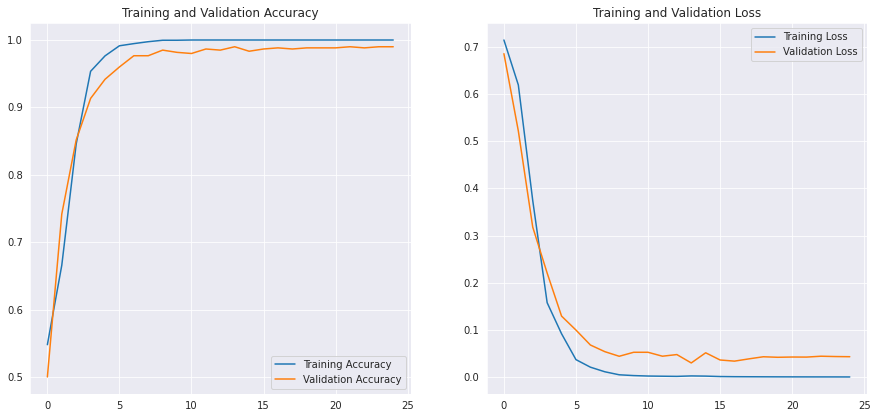

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Text(0, 0.5, 'Loss')

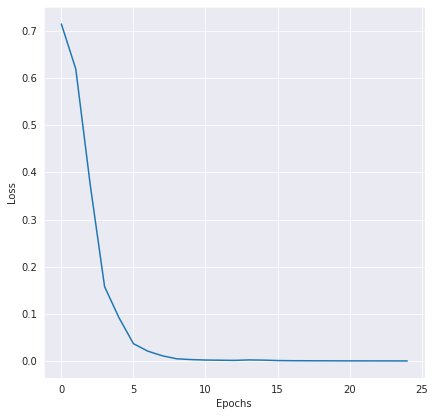

In [67]:
loss = history.history['loss']
epochs_range = range(25)
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, loss, label='loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [68]:
"""
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]

print(classification_report(y_val, predictions, target_names = ['Rugby (Class 0)','Soccer (Class 1)']))
"""

"\npredictions = model.predict_classes(x_test)\npredictions = predictions.reshape(1,-1)[0]\n\nprint(classification_report(y_val, predictions, target_names = ['Rugby (Class 0)','Soccer (Class 1)']))\n"

In [69]:
#on test data
predictions = model.predict(x_test)
pred=np.argmax(predictions,axis=1)
pred = pred.reshape(1,-1)[0]
print(classification_report(y_test,pred, target_names = ['Non Oil Spill(Class 0)','Oil Spill (Class 1)']))

                        precision    recall  f1-score   support

Non Oil Spill(Class 0)       0.99      1.00      1.00       300
   Oil Spill (Class 1)       1.00      0.99      1.00       300

              accuracy                           1.00       600
             macro avg       1.00      1.00      1.00       600
          weighted avg       1.00      1.00      1.00       600



In [70]:
model.evaluate(x_test,y_test,batch_size=32)

19/19 [==============================] - 0s 8ms/step - loss: 0.0126 - accuracy: 0.9967


[0.012568245641887188, 0.996666669845581]

In [71]:
pred.shape

(600,)

In [72]:
y_test.shape

(600,)

In [77]:
#on training data
predictions = model.predict(x_train)
pred_train=np.argmax(predictions,axis=1)
pred_train = pred_train.reshape(1,-1)[0]
print(classification_report(y_train,pred_train, target_names = ['Non Oil Spill(Class 0)','Oil Spill (Class 1)']))

                        precision    recall  f1-score   support

Non Oil Spill(Class 0)       1.00      1.00      1.00      1400
   Oil Spill (Class 1)       1.00      1.00      1.00      1400

              accuracy                           1.00      2800
             macro avg       1.00      1.00      1.00      2800
          weighted avg       1.00      1.00      1.00      2800



In [78]:
model.evaluate(x_train,y_train,batch_size=32)

88/88 [==============================] - 1s 8ms/step - loss: 2.8365e-04 - accuracy: 1.0000


[0.00028364951140247285, 1.0]

In [79]:
#on validation data
predictions = model.predict(x_val)
pred_val=np.argmax(predictions,axis=1)
pred_val = pred_val.reshape(1,-1)[0]
print(classification_report(y_val,pred_val, target_names = ['Non Oil Spill(Class 0)','Oil Spill (Class 1)']))

                        precision    recall  f1-score   support

Non Oil Spill(Class 0)       0.98      1.00      0.99       300
   Oil Spill (Class 1)       1.00      0.98      0.99       300

              accuracy                           0.99       600
             macro avg       0.99      0.99      0.99       600
          weighted avg       0.99      0.99      0.99       600



In [80]:
model.evaluate(x_val,y_val,batch_size=32)

19/19 [==============================] - 0s 9ms/step - loss: 0.0432 - accuracy: 0.9900


[0.043228376656770706, 0.9900000095367432]

In [73]:
#https://www.drivendata.co/blog/pri-matrix-factorization-benchmark/